In [135]:
import pandas as pd
import csv
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score


In [34]:
data = pd.read_excel('Financial Fraud Detection Data.xlsx')

In [35]:
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [38]:
print(data.isna().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [39]:
print(data.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [47]:
#percentage of transactions classified as fraud
fraud = len(data[data['isFraud'] == 1])
percent_fraud = (len(data[data['isFraud']==1])/len(data['isFraud'])) * 100
print('Percentage of transactions classified as fraud:',percent_fraud)
print('Count of transactions clasified as fraud:',fraud)

#percentage of transacction classified as not fraud
no_fraud = len(data[data['isFraud'] == 0])
percent_no_fraud = (len(data[data['isFraud']==0])/len(data['isFraud'])) * 100
print('Percentage of transactions classified as no fraud:',percent_no_fraud)
print("Count of transactions classified as not fraud:",no_fraud)

Percentage of transactions classified as fraud: 1.0050251256281406
Count of transactions clasified as fraud: 2
Percentage of transactions classified as no fraud: 98.99497487437185
Count of transactions classified as not fraud: 197


In [53]:
#average of amount of transactions classified as fraud or not fraud
data.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,1.0,109202.608071,43289.710609,37252.427513,321718.643807,1.316701e+06,0.0
1,1.0,181.000000,181.000000,0.000000,10591.000000,0.000000e+00,0.0


In [54]:
data.groupby('type').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,,,,,,,,
CASH_OUT,1.0,129090.103239,10632.216620,2637.732817,625023.491972,1.976754e+06,0.014085,0.0
DEBIT,1.0,5091.462143,96292.142857,92006.705714,92514.558571,2.358598e+04,0.000000,0.0
PAYMENT,1.0,4886.866744,71593.072326,67986.652442,0.000000,0.000000e+00,0.000000,0.0
TRANSFER,1.0,423440.266071,9587.621071,589.400000,633138.681429,4.239653e+06,0.035714,0.0


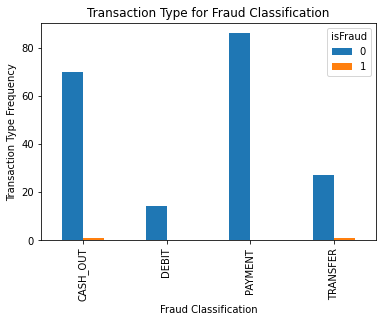

In [55]:
%matplotlib inline
pd.crosstab(data.type,data.isFraud).plot(kind='bar')
plt.title('Transaction Type for Fraud Classification')
plt.xlabel('Fraud Classification')
plt.ylabel('Transaction Type Frequency')
plt.savefig('transaction_fre_type')

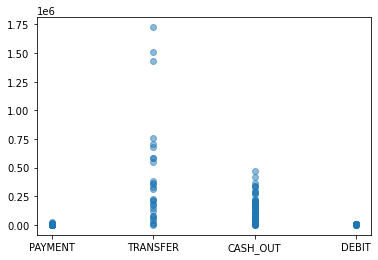

In [70]:
x = data['type']
y = data['amount']
plt.scatter(x,y,alpha=0.5)
plt.show()


In [133]:
#label encoder for type column because str dtype is not accepted in training model
cols = ['type', 'nameOrig', 'nameDest']
data[cols]= data[cols].apply(preprocessing.LabelEncoder().fit_transform)
#label_encoder = preprocessing.LabelEncoder()
#data['type'] = label_encoder.fit_transform(data['type'])
#data['type'].unique()



In [162]:
X = data.drop("isFraud", axis=1)
y = data["isFraud"]


In [137]:
#split the data into training and testing sets for Random Forest classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
#split the features and labels into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [164]:
model = LogisticRegression(solver='liblinear')

In [121]:
#Create a Random Forest classifier
model = RandomForestClassifier()

In [165]:
#Train the model
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [166]:
predicted = model.predict(X_test)

In [167]:
# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Confusion matrix:
 [[60]]
